C:\Users\Michahaha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


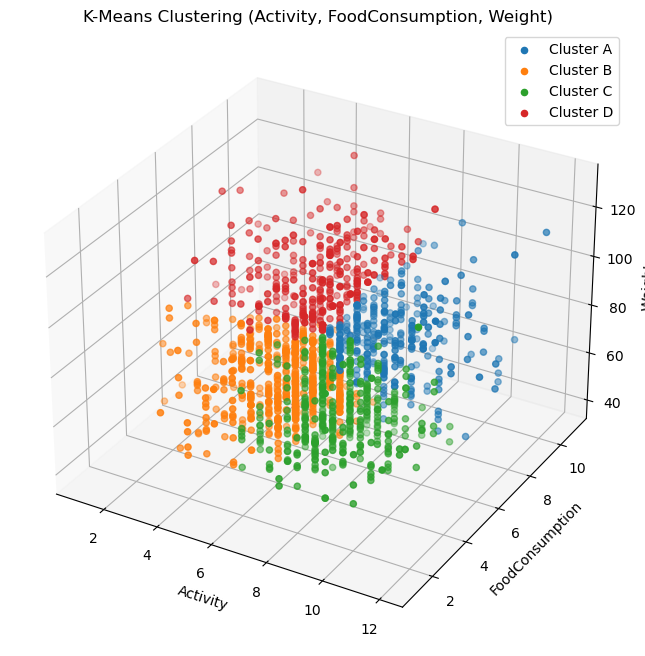

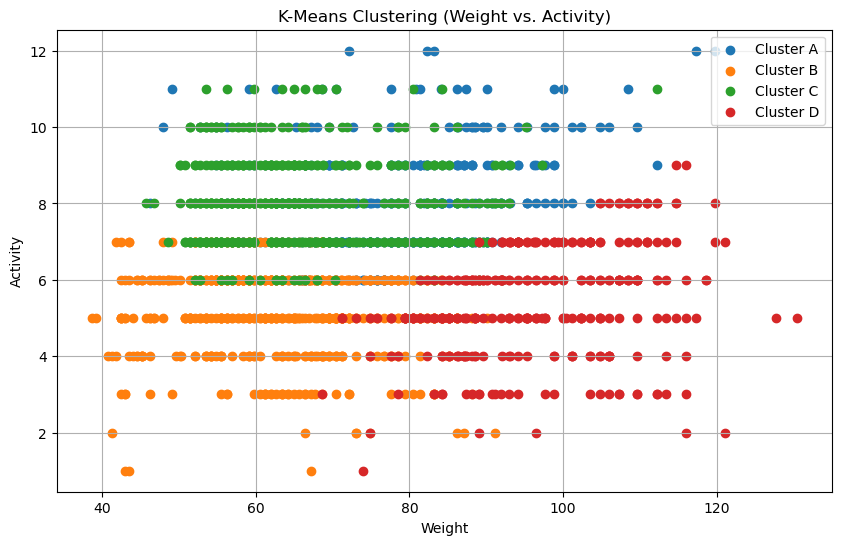

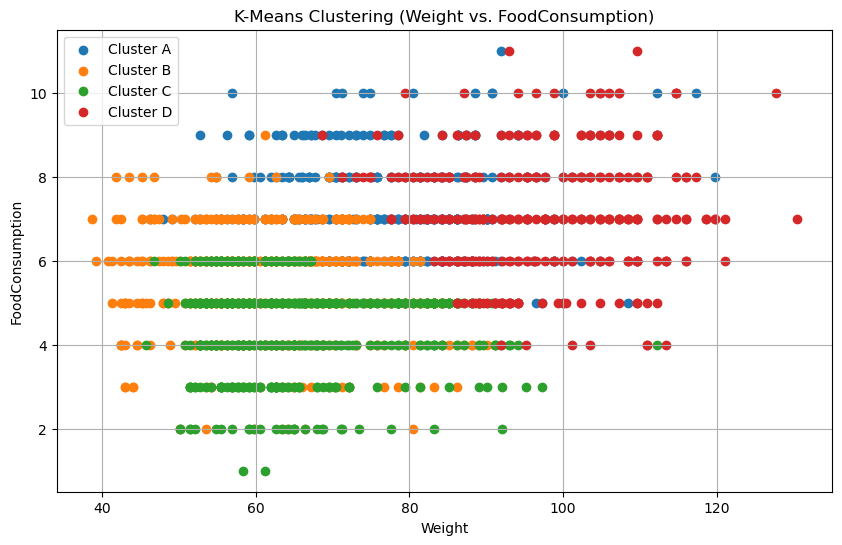

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datei laden
file_path = "data/Obesity_Dataset_FE.xlsx"
data = pd.read_excel(file_path)

# Relevante Spalten auswählen
selected_columns = ['Activity', 'Weight', 'FoodConsumption']
data_selected = data[selected_columns].copy()  # Kopie erstellen, um SettingWithCopyWarning zu vermeiden

# Daten skalieren
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# K-Means-Clusteranalyse
kmeans = KMeans(n_clusters=4, random_state=2, n_init=20)
kmeans.fit(data_scaled)

# Cluster-Zuordnungen hinzufügen
data_selected['Cluster'] = kmeans.labels_

# Benutzerdefinierte Cluster-Namen
cluster_names = ['Cluster A', 'Cluster B', 'Cluster C', 'Cluster D']

# 1. Visualisierung: 3D-Grafik
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):  # Es gibt 4 Cluster
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    ax.scatter(
        cluster_data['Activity'],
        cluster_data['FoodConsumption'],
        cluster_data['Weight'],
        label=cluster_names[cluster]  # Benutzerdefinierte Namen in der Legende
    )

ax.set_title('K-Means Clustering (Activity, FoodConsumption, Weight)')
ax.set_xlabel('Activity')
ax.set_ylabel('FoodConsumption')
ax.set_zlabel('Weight')
ax.legend()
plt.show()

# 2. Visualisierung: 2D-Grafik (Activity vs. FoodConsumption)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Weight'],
        cluster_data['Activity'],
        label=cluster_names[cluster]
    )

plt.title('K-Means Clustering (Weight vs. Activity)')
plt.xlabel('Weight')
plt.ylabel('Activity')
plt.legend()
plt.grid(True)
plt.show()

# 3. Visualisierung: 2D-Grafik (Weight vs. FoodConsumption)
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = data_selected[data_selected['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Weight'],
        cluster_data['FoodConsumption'],
        label=cluster_names[cluster]
    )

plt.title('K-Means Clustering (Weight vs. FoodConsumption)')
plt.xlabel('Weight')
plt.ylabel('FoodConsumption')
plt.legend()
plt.grid(True)
plt.show()

